# Linear Regression Exercise

**Description of the problem**

Predicting the cost of health insurance for a person.\
The important insurance company 4Geeks Insurance S.L. wants to calculate, based on the physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.

The dataset can be found in this project folder under the name medical_insurance_cost.csv. You can load it into the code directly from the link:\
https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv


## Variables
**age** Age of primary beneficiary (numeric)\
**sex** Gender of the primary beneficiary (categorical)\
**bmi** Body mass index (numeric)\
**children** Number of children/dependents covered by health insurance (numeric)\
**smoker** Is the person a smoker? (categorical)\
**region** Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)\
**charges** Health insurance premium (numerical)

# Table of Contents

<a id='table_of_contents'></a>

0. [Import Libraries](#0)
1. [Import Data](#1)
2. [Data Exploration](#2)
3. [Univariate Analysis](#3)
4. [Data Preparation](#4)
5. [Feature Engineering](#5)

# 0. Import Libraries <a id='0'></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

[Back to top](#table_of_contents)

# 1. Import Data <a id='1'></a>

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
display(data)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
data.to_csv("../data/raw/data.csv", index=False)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


[Back to top](#table_of_contents)

# 2. Data Exploration <a id='2'></a>

In [18]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 3. Univariate Analysis <a id='3'></a>

## 3.1. Categorical Variables

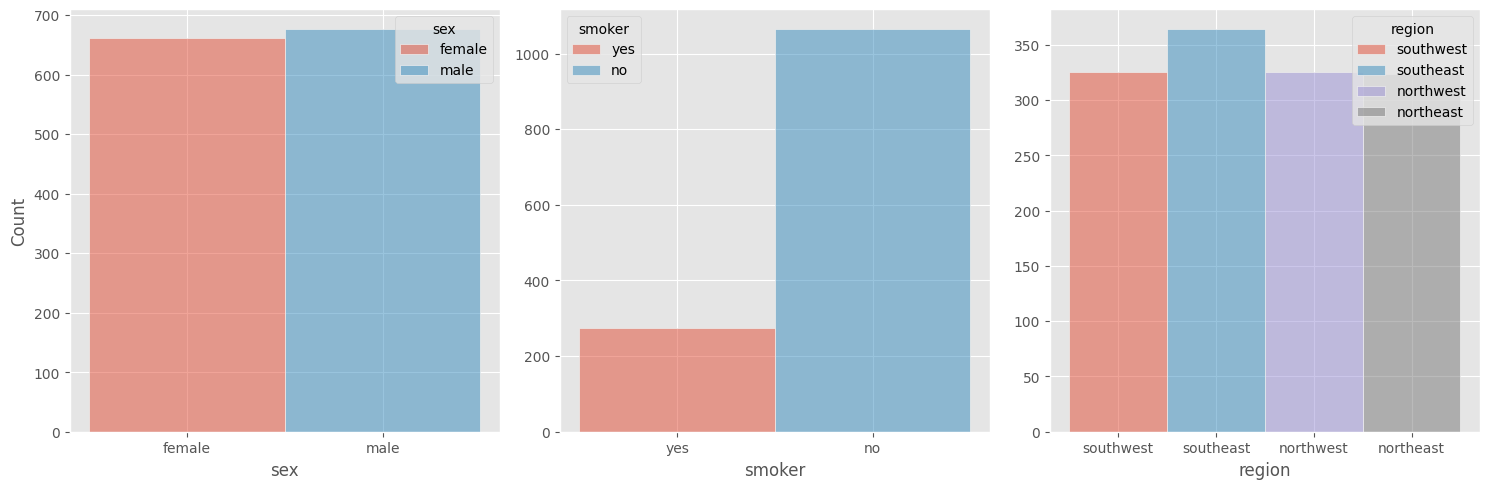

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(ax=axes[0], data=data, x="sex", hue="sex")
sns.histplot(ax=axes[1], data=data, x="smoker", hue="smoker").set(ylabel=None)
sns.histplot(ax=axes[2], data=data, x="region", hue="region").set(ylabel=None)

plt.tight_layout()
plt.show()

- **sex**: There is no significant difference between female and male.
- **smoker**: There is around 300 smokers in the group.
- **region**: The southeast region has slightly more people than the others.


## 3.2. Numeric Variables

In [26]:
# Outlier Detection

def get_column_stat(column):
    stats = data[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr

    print(f"The stats for the '{column}' column are:\n")
    print(f"- Upper limit: {round(upper_limit,2)}")
    print(f"- Lower limit: {round(lower_limit,2)}")
    print(f"- Interquartile range: {round(iqr,2)}\n")
    print(f"{stats}\n")

### age

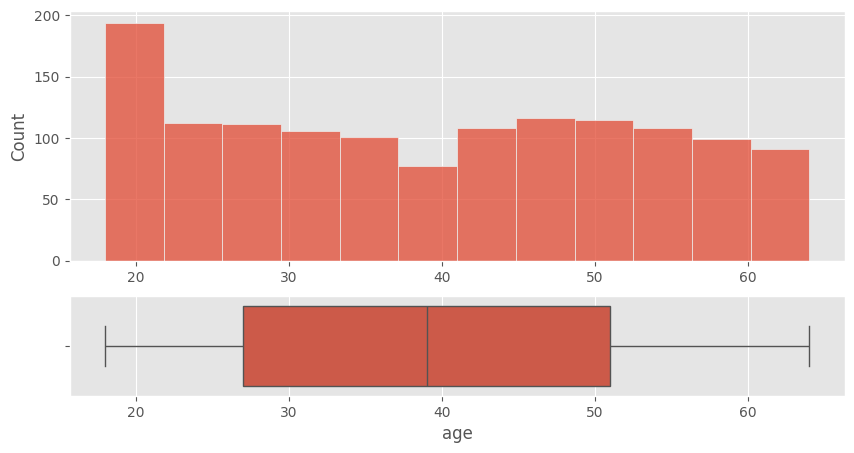

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="age", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="age", ax=axes[1])

plt.show()

### bmi

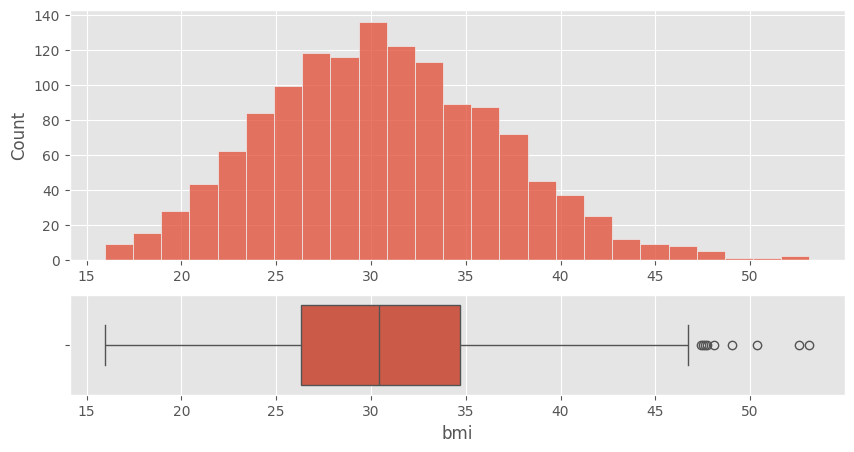

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="bmi", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="bmi", ax=axes[1])

plt.show()

[Back to top](#table_of_contents)

### children

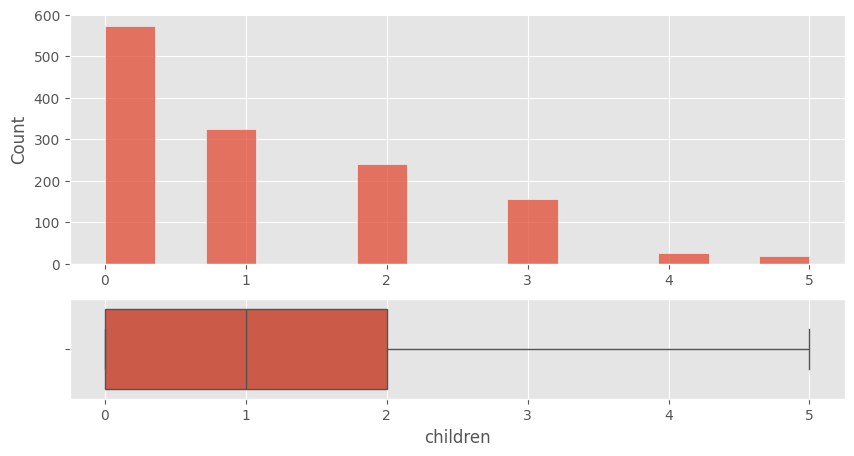

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="children", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="children", ax=axes[1])

plt.show()

### charges

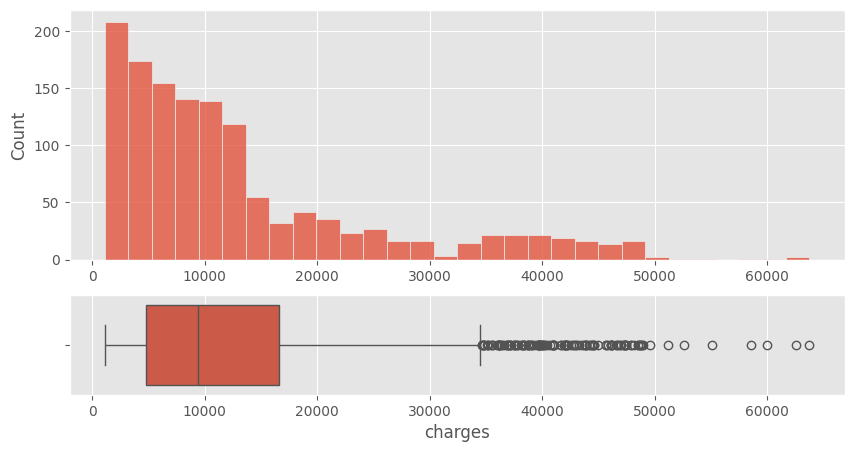

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="charges", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="charges", ax=axes[1])

plt.show()

[Back to top](#table_of_contents)

# 4. Multivariate Analysis <a id='4'></a>

## 4.1. Categoric-categoric Analysis

## 4.2. Numeric-numeric Analysis

## 4.3. Combination with Predictors

## 4.4. Correlation Analysis

[Back to top](#table_of_contents)

# 5. Feature Engineering <a id='5'></a>

## 5.1. Outlier Analysis

## 5.2. Missing Values Analysis

## 5.3. Inference of New Features

## 5.4. Feature Scaling

[Back to top](#table_of_contents)

# 6. Feature Selection

[Back to top](#table_of_contents)